In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
data = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = data.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
#create valid daatset and scale the input to 0-1 range 
X_train = X_train_full/255.0

In [6]:
X_test = X_test/255.0

In [14]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=[28,28]),
        keras.layers.Dense(300, activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(10, activation='softmax')

])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


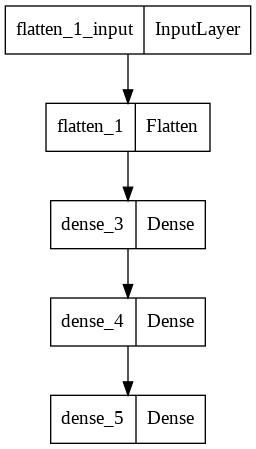

In [16]:
keras.utils.plot_model(model)

In [17]:
model.layers[1]

In [18]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'],optimizer='sgd')

#using sparse categorical crossentropy because the output is 0-9 classes and not one-hot encoded type multilable 
#in that case, we could convert using keras.utils.to_categorical and then use cross_entropy as loss 
# if it was binary classfication, we would us sigmoid as activation function in last layer and binary_crossentropy as loss 

In [19]:
history = model.fit(x=X_train, y=y_train_full, batch_size=32, epochs=5,validation_split=0.1)

#don;t need to create validation dataset manually. validation_split option shuffles and splits the data 
#class_weight option can be used for imbalanced classes by providing a dict of classes and their weights 

Epoch 1/5
1688/1688 [==============================] - 8s 4ms/step - loss: 0.7103 - accuracy: 0.7655 - val_loss: 0.5128 - val_accuracy: 0.8237
Epoch 2/5
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4865 - accuracy: 0.8305 - val_loss: 0.4703 - val_accuracy: 0.8317
Epoch 3/5
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4426 - accuracy: 0.8454 - val_loss: 0.4315 - val_accuracy: 0.8463
Epoch 4/5
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4162 - accuracy: 0.8551 - val_loss: 0.4641 - val_accuracy: 0.8407
Epoch 5/5
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3954 - accuracy: 0.8613 - val_loss: 0.4141 - val_accuracy: 0.8492


In [20]:
history.params

{'epochs': 5, 'steps': 1688, 'verbose': 1}

In [21]:
history.epoch

[0, 1, 2, 3, 4]

In [22]:
history.history
#The dictionary that stores the info at each epoch

{'accuracy': [0.765500009059906,
  0.8305000066757202,
  0.845370352268219,
  0.8550740480422974,
  0.8613148331642151],
 'loss': [0.7102954983711243,
  0.4865277409553528,
  0.44261065125465393,
  0.41618794202804565,
  0.3953724205493927],
 'val_accuracy': [0.8236666917800903,
  0.8316666483879089,
  0.8463333249092102,
  0.840666651725769,
  0.8491666913032532],
 'val_loss': [0.5127506852149963,
  0.4703288674354553,
  0.43153584003448486,
  0.4641013443470001,
  0.41414836049079895]}

(0.0, 1.0)

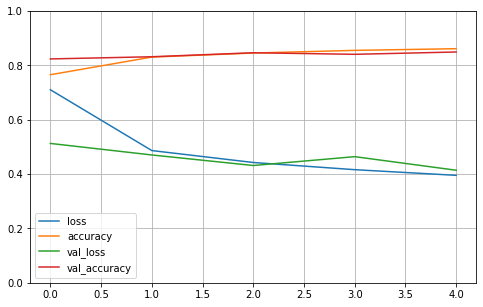

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] plt.show()

for training loss graph. it should be shifted by half epoch to the left

In [24]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4398 - accuracy: 0.8432


[0.4398316442966461, 0.8432000279426575]

In [25]:
X_prob = X_test[:3]
import numpy as np
preds = model.predict(X_prob)
classes_x=np.argmax(preds,axis=1)

In [26]:
classes_x

array([9, 2, 1])